In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('linear_regression_dataset.csv')

In [3]:
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [4]:
df.shape

(500, 6)

In [5]:
df = df.dropna(axis=0)
df.shape

(499, 6)

In [6]:
df.columns


Index(['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AGE'] = le.fit_transform(df['AGE'])
df['FEMALE'] = le.fit_transform(df['FEMALE'])
df['LOS'] = le.fit_transform(df['LOS'])
df['RACE'] = le.fit_transform(df['RACE'])
df['TOTCHG'] = le.fit_transform(df['TOTCHG'])
df['APRDRG'] = le.fit_transform(df['APRDRG'])

In [8]:
x = df.drop(['TOTCHG'],axis=1)
y = df['TOTCHG']

In [9]:
x.head()

,AGE,FEMALE,LOS,RACE,APRDRG
0,17,1,2,0,31
1,17,0,2,0,50
2,17,1,7,0,61
3,17,1,1,0,54
4,17,1,1,0,51


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)

In [11]:
def linear_regression(X,Y,LR,epochs):
    m = len(X)
    w = np.zeros(X.shape[1])
    b = 0
    costfunction = []
    for i in range(epochs):
        y_hat = np.dot(w, X.T) + b
        error =round(y_hat - Y,8)
        costfn = np.sum(round((error**2)/(2*m),5))
        w_gradient =np.dot(X.T, error)/m           
        b_gradient = np.sum(error/m) 
        w = w - LR*w_gradient
        b = b - LR*b_gradient
        costfunction.append((costfn))

        if i%100 == 0:
            print(f"costfunction at {i}:",round(costfn,5))
    
    plt.plot(range(epochs),costfunction)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.show()
    
    return w,b,costfn


In [12]:
def checkaccuracy(w, b, X, Y):
    erroravg = 0
    m = len(X)
    for i, row in X.iterrows():
        y_hat = np.dot(w, row) + b
        erroravg += np.absolute(round(y_hat - Y[i], 5))
    avg_error = erroravg * 100 / m
    accuracy = 100 - avg_error
    return avg_error

costfunction at 0: 29614.70427
costfunction at 100: 9.733675355005325e+58
costfunction at 200: 5.254303676841775e+113
costfunction at 300: 2.8363086009721934e+168
costfunction at 400: 1.531058533104114e+223
costfunction at 500: 8.264757336304823e+277


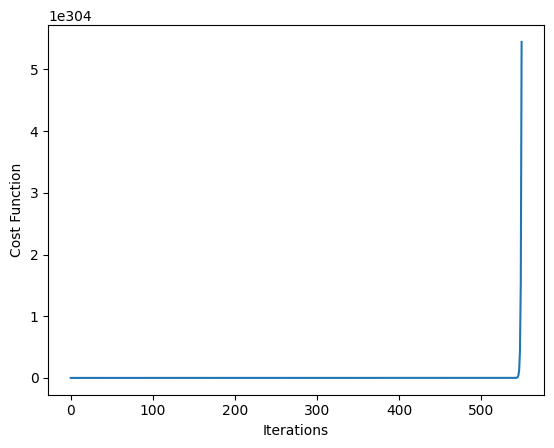

train error : 6.002274111322784e+154 
test error : 5.766004653678581e+154 


In [17]:
w,b,costfn = linear_regression(X_train,Y_train,0.0015,550)
train_error = checkaccuracy(w,b,X_train,Y_train)
test_error = checkaccuracy(w,b,X_test,Y_test)
print(f"train error : {train_error} ")
print(f"test error : {test_error} ")